In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Rainfall_data.csv")
df.head()

,Year,Annual_rain
0,1901,1649.1
1,1902,1641.8
2,1903,2024.8
3,1904,2016.4
4,1905,1325.1


In [ ]:
df.tail()

,Year,Annual_rain
110,2011,1558.6
111,2012,992.3
112,2013,1974.2
113,2014,1188.1
114,2015,1186.0


Text(0.5, 1.0, 'Rainfall in mm (1901-2015)')

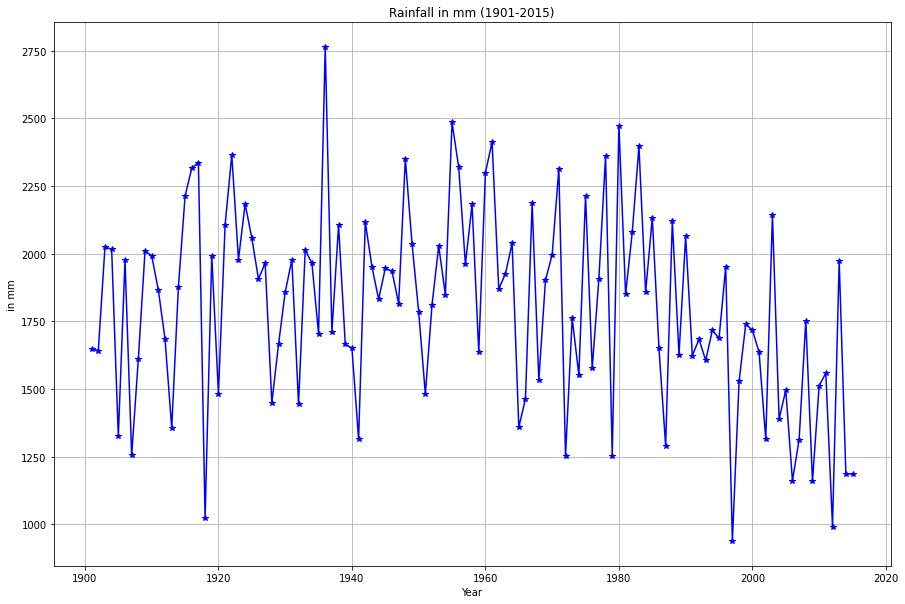

In [ ]:
Year = df["Year"]
rainfall = df["Annual_rain"]
plt.figure(figsize=(15,10))
plt.plot(Year,rainfall,"b-*")
plt.xlabel("Year")
plt.ylabel("in mm")
plt.grid(True)
plt.title("Rainfall in mm (1901-2015)")

In [ ]:
lst=[]
a=[]
b=[]
y=[]
a.append(list(df.iloc[1,1:]))
a.append(list(df.iloc[2,1:]))
y.append(list(df.iloc[3,1:]))
print("a:",a)
lst.append(a)
b.append(list(df.iloc[2,1:]))
b.append(list(df.iloc[3,1:]))
y.append(list(df.iloc[4,1:]))
print("b:",b)
lst.append(b)
print("lst:",lst)
print("Y:",y)

a: [[1641.8], [2024.8]]
b: [[2024.8], [2016.4]]
lst: [[[1641.8], [2024.8]], [[2024.8], [2016.4]]]
Y: [[2016.4], [1325.1]]


In [ ]:
def preprocess(Data,n):
  len = Data.shape[0]
  x_arr=[]
  y_arr=[]
  for i in range(0,len-n):
    try:
      lst=[]
      lst.append(list(Data.iloc[i,1:]))
      lst.append(list(Data.iloc[i+1,1:]))
      x_arr.append(lst)
      y_arr.append(list(Data.iloc[i+2,1:]))
    except:
      pass
  print("Data preprocessed successfully!")
  return np.array(x_arr),np.array(y_arr)

In [ ]:
x,y = preprocess(df,2)

Data preprocessed successfully!


In [ ]:
x.shape

(113, 2, 1)

In [ ]:
y.shape

(113, 1)

In [ ]:
df.shape

(115, 2)

In [ ]:
x[-1]

array([[1974.2],
       [1188.1]])

In [ ]:
y[-1]

array([1186.])

In [ ]:
df.tail(5)

,Year,Annual_rain
110,2011,1558.6
111,2012,992.3
112,2013,1974.2
113,2014,1188.1
114,2015,1186.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout 
model = Sequential()
model.add(LSTM(100, activation='relu',return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 7ms/step - loss: 3477990.0000
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 3355897.0000
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 3281856.2500
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 3220531.7500
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 3157388.7500
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 3091470.2500
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 3012418.7500
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 2803714.0000
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 2524518.0000
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 2291678.5000
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 2009054.8750
Epoch 12/500
4/4 [==============================] - 0s 7ms/step - loss: 16

In [ ]:
model.save('tmp.h5')